# Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np

# Reading the data & gathering short information

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Regression/Car Price Prediction/cars_dataset.csv')
print(df.shape)
df.head()

(72435, 10)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  object 
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  object 
 4   mileage       72435 non-null  int64  
 5   fuelType      72435 non-null  object 
 6   tax           72435 non-null  float64
 7   mpg           72435 non-null  float64
 8   engineSize    72435 non-null  float64
 9   Make          72435 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,2017.073666,16580.158708,23176.517057,116.953407,55.852480,1.635650
std,2.101252,9299.028754,21331.515562,64.045533,17.114391,0.561535
min,1996.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10175.000000,7202.500000,30.000000,47.900000,1.200000
50%,2017.000000,14495.000000,17531.000000,145.000000,55.400000,1.600000
75%,2019.000000,20361.000000,32449.000000,145.000000,62.800000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


In [ ]:
categoricals = list(df.select_dtypes('object').columns)
numericals = [col for col in df.columns if col not in categoricals]
print(categoricals)
print(numericals)

['model', 'transmission', 'fuelType', 'Make']
['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']


In [ ]:
# Turn 'object' into category for less memory usage.
df[categoricals] = df[categoricals].astype('category')
df[categoricals].dtypes

model           category
transmission    category
fuelType        category
Make            category
dtype: object

# Exploratory Data Analysis (EDA)

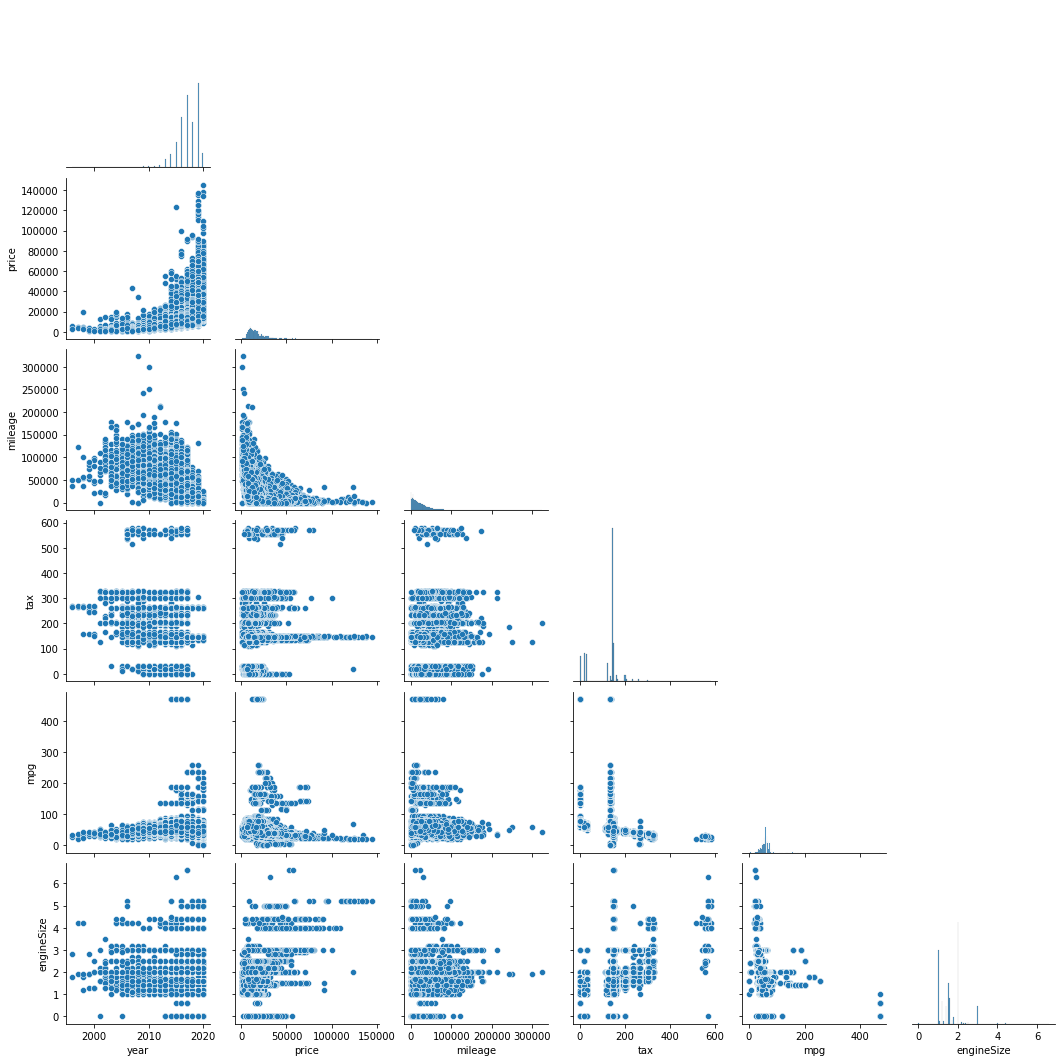

In [ ]:
# Relationships between numerical features
sns.pairplot(df, corner=True)

In [ ]:
for col in df[categoricals]:
  print(f'We have {len(df[col].unique())} unique values in --{col}-- column: {df[col].unique()}', '\n')

We have 146 unique values in --model-- column: [' A1', ' A6', ' A4', ' A3', ' Q3', ..., ' Santa Fe', ' Accent', ' Terracan', ' Getz', ' Amica']
Length: 146
Categories (146, object): [' A1', ' A6', ' A4', ' A3', ..., ' Accent', ' Terracan', ' Getz',
                           ' Amica'] 

We have 4 unique values in --transmission-- column: ['Manual', 'Automatic', 'Semi-Auto', 'Other']
Categories (4, object): ['Manual', 'Automatic', 'Semi-Auto', 'Other'] 

We have 5 unique values in --fuelType-- column: ['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric']
Categories (5, object): ['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'] 

We have 7 unique values in --Make-- column: ['audi', 'BMW', 'Ford', 'vw', 'toyota', 'skoda', 'Hyundai']
Categories (7, object): ['audi', 'BMW', 'Ford', 'vw', 'toyota', 'skoda', 'Hyundai'] 



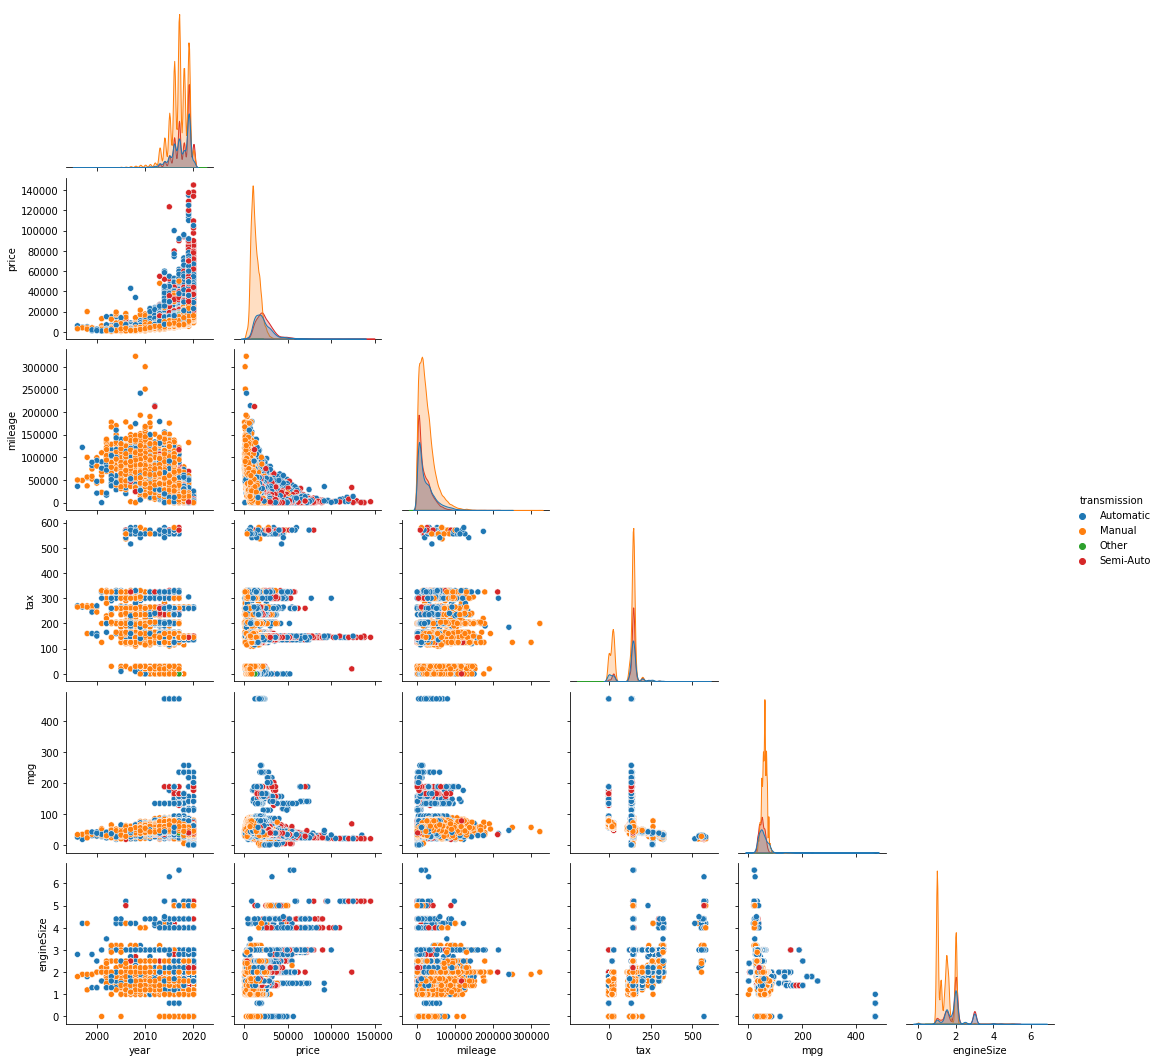

In [ ]:
# Let's induce some categorical variables on our relationships --- transmission
sns.pairplot(df, hue='transmission', corner=True)

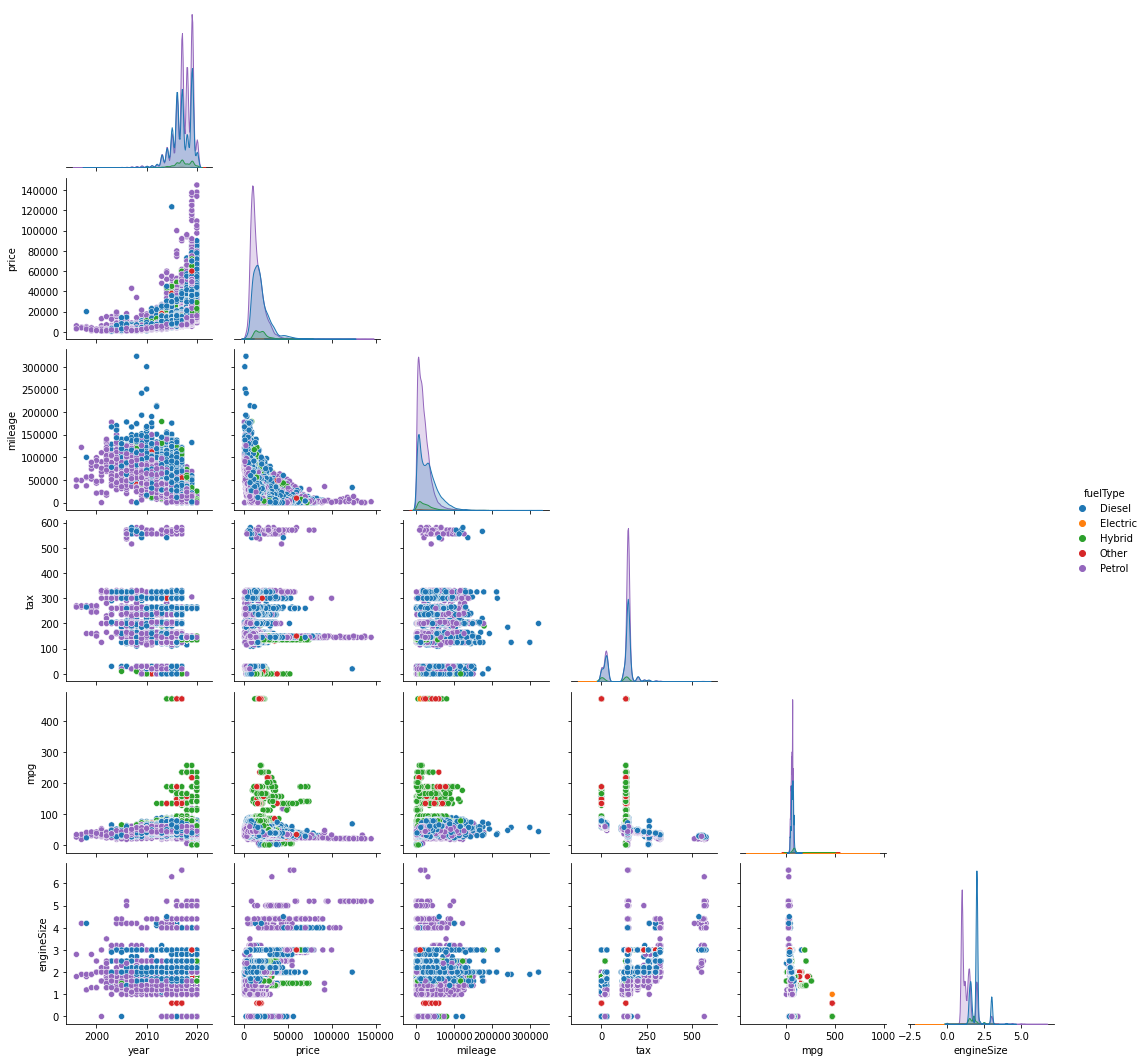

In [ ]:
# Let's induce some categorical variables on our relationships --- fuelType
sns.pairplot(df, hue='fuelType', corner=True)

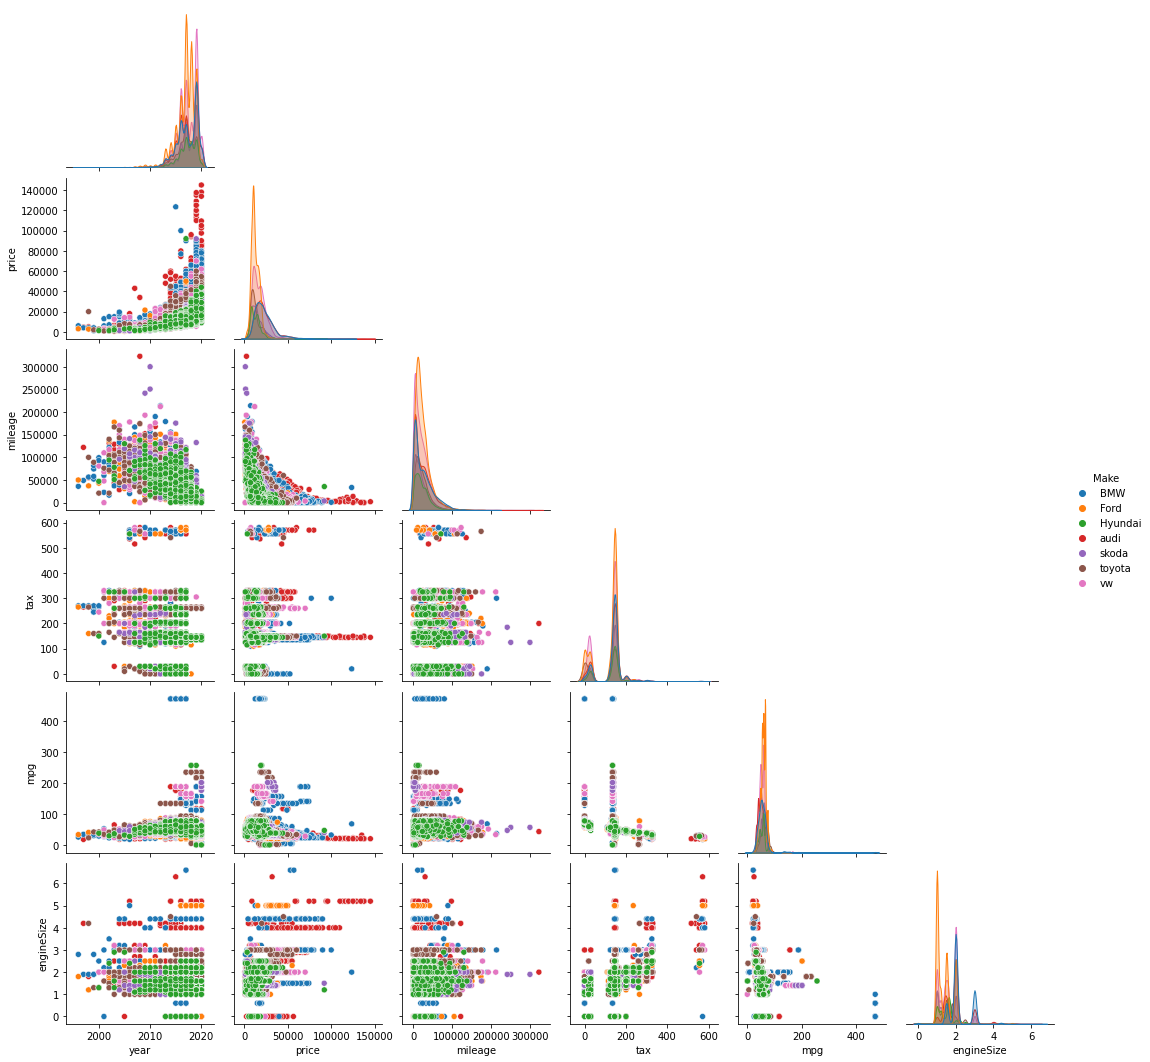

In [ ]:
# Let's induce some categorical variables on our relationships --- Make
sns.pairplot(df, hue='Make', corner=True)

## Explore categorical features

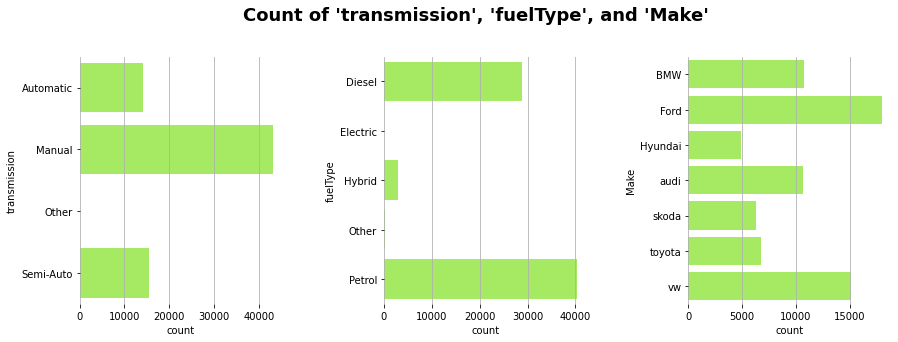

In [ ]:
# Count plots for 'transmission', 'fuelType', 'Make'.
x=0
fig=plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace = 0.5)
plt.suptitle("Count of 'transmission', 'fuelType', and 'Make'", x=0.4 ,y=0.95, family='Sherif', size=18, weight='bold')
for i in df[categoricals[1:]]:
  ax = plt.subplot(241+x)
  ax = sns.countplot(data=df, y=i, color='#a6ff4d')
  plt.grid(axis='x')
  x+=1

In [ ]:
colors = ['#101907', '#314c17', '#63992e', '#95e545', '#aeff5e', '#c0ff82', '#dbffb7']

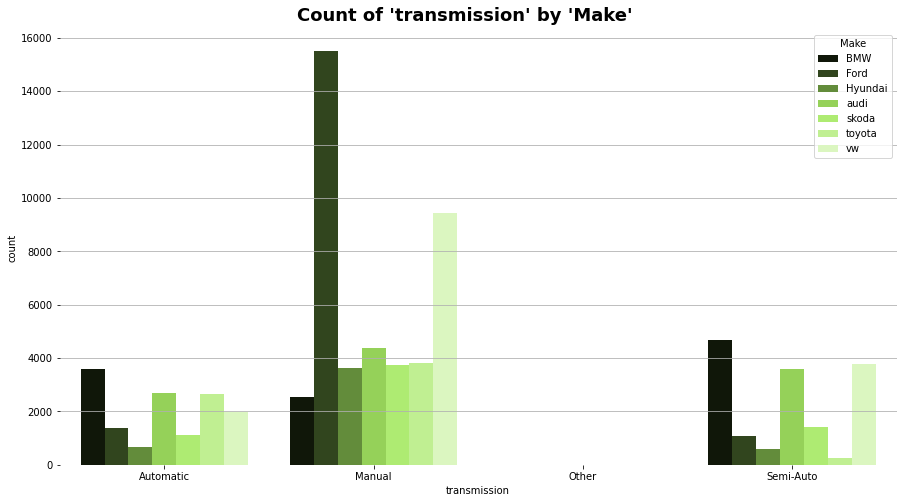

In [ ]:
# Count of 'transmission' by  'Make'
fig=plt.figure(figsize=(15,8))
plt.suptitle("Count of 'transmission' by 'Make'", x=0.5 ,y=0.92, family='Sherif', size=18, weight='bold')
sns.countplot(data=df, x='transmission', hue='Make', palette=colors)
plt.grid(axis='y')

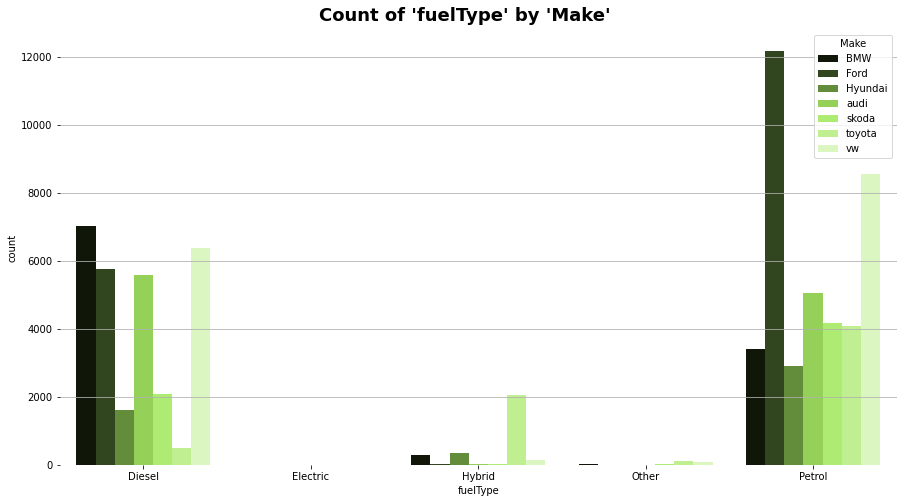

In [ ]:
# Count of 'fuelType' by 'Make'
fig=plt.figure(figsize=(15,8))
plt.suptitle("Count of 'fuelType' by 'Make'", x=0.5 ,y=0.92, family='Sherif', size=18, weight='bold')
sns.countplot(data=df, x='fuelType', hue='Make', palette=colors)
plt.grid(axis='y')

## Explore numerical features

In [ ]:
# Variance of numerical features
df.var()

year          4.415260e+00
price         8.647194e+07
mileage       4.550336e+08
tax           4.101830e+03
mpg           2.929024e+02
engineSize    3.153214e-01
dtype: float64

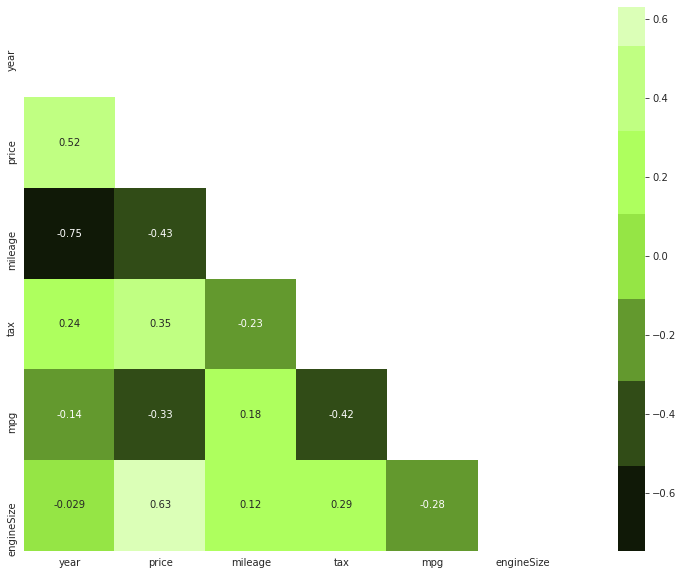

In [ ]:
# Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
  fig, ax = plt.subplots(figsize=(18,10))
  sns.heatmap(corr,  mask=mask, annot=True, cmap=colors, center=0, square=True)

 - Moderate positive correlation between price & engineSize
 - Moderate negative correlation between year & mileage

In [ ]:
# Show spines (black border of the plot)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = True

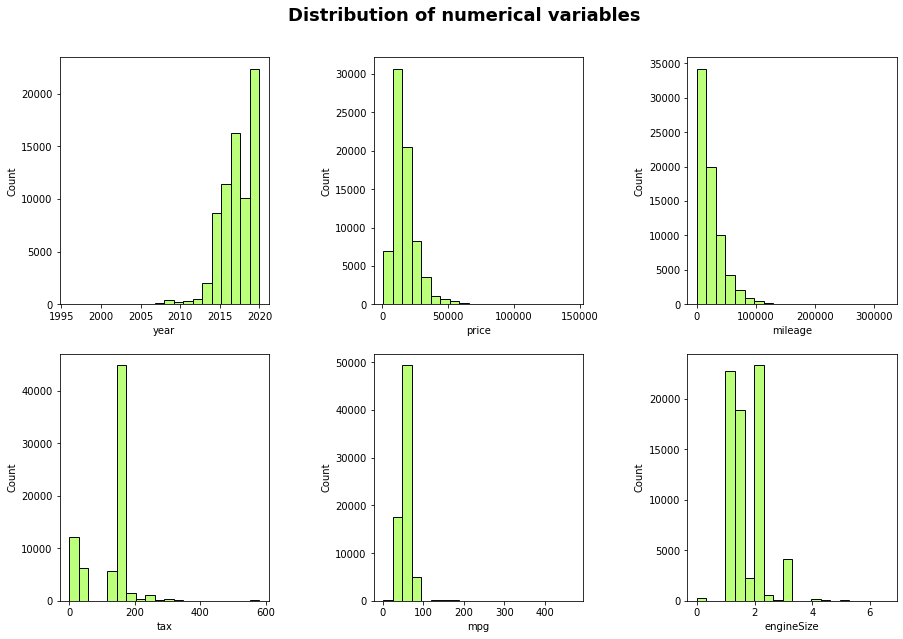

In [ ]:
# Distribution of numerical features
x=0
fig=plt.figure(figsize=(15,10),constrained_layout =True)
plt.subplots_adjust(wspace = 0.5)
plt.suptitle("Distribution of numerical variables",y=0.95, family='Sherif', size=18, weight='bold')
for i in df[numericals]:
  ax = plt.subplot(231+x)
  ax = sns.histplot(data=df, x=i, bins=20, color='#a6ff4d')
  x+=1

## Investigate both categorical & numerical features


Answering some questions:

 - **What is the mean price of a car by its 'Make'?**

 - **What is the mean price of a car by its 'transmission'?**

 - **What is the mean price of a car by its 'fuelType'?**

In [ ]:
# Hide spines (black border of the plot)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

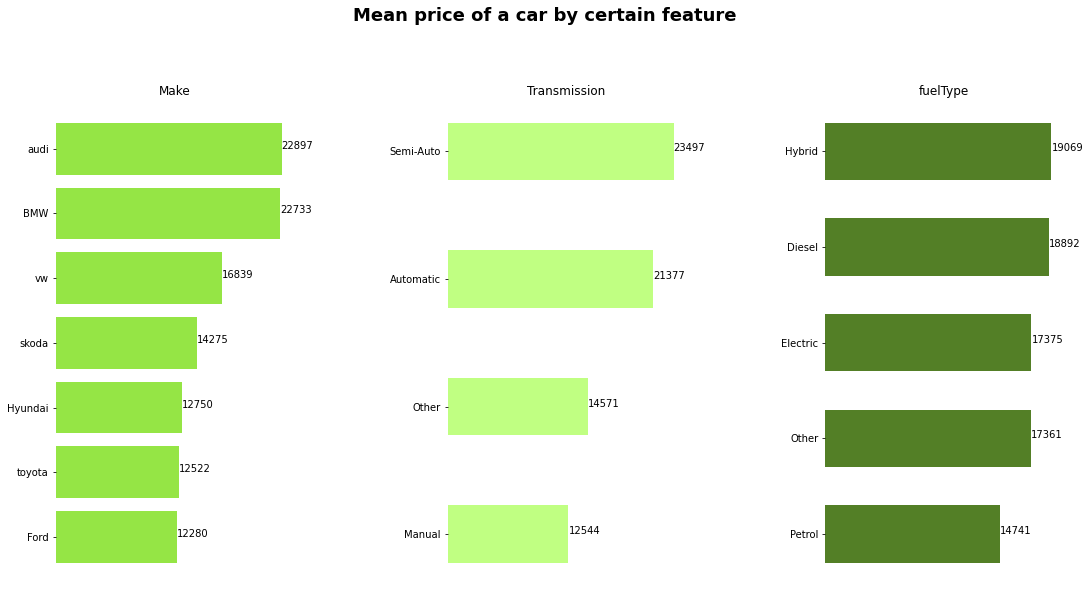

In [ ]:
mp_make = df.groupby('Make')['price'].mean().sort_values()
mp_transmission = df.groupby('transmission')['price'].mean().sort_values()
mp_fueltype = df.groupby('fuelType')['price'].mean().sort_values()


fig, ax = plt.subplots(1,3, figsize=[15,7], constrained_layout=True)
plt.suptitle("Mean price of a car by certain feature",y=1.15, family='Sherif', size=18, weight='bold')

# First plot
vals_0 = [round(i) for i in mp_make]
ax[0].barh(mp_make.index, mp_make, color = '#95e545')
ax[0].set_title("Make")
ax[0].set_xticks([])
for index, value in enumerate(vals_0):
  ax[0].text(value, index, str(value))

# Second plot
vals_1 = [round(i) for i in mp_transmission]
ax[1].barh(mp_transmission.index, mp_transmission, 0.45, color = '#c0ff82')
ax[1].set_title("Transmission")
ax[1].set_xticks([])
for index, value in enumerate(vals_1):
  ax[1].text(value, index, str(value))

# Third plot
vals_2 = [round(i) for i in mp_fueltype]
ax[2].barh(mp_fueltype.index, mp_fueltype, 0.6, color = '#537f26')
ax[2].set_title("fuelType")
ax[2].set_xticks([])
for index, value in enumerate(vals_2):
  ax[2].text(value, index, str(value))

# Layout spacing
fig.set_constrained_layout_pads(w_pad=2 / 72, h_pad=2 / 72, hspace=0.2,
                                wspace=0.2)

The above approach can be applied to further investigate with other aggregate functions or other numerical columns such as: 'mileage', 'tax', 'mpg' or 'engineSize'.

**Explore 'mileage' on 'year'**

In [ ]:
# Show spines (black border of the plot)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = True

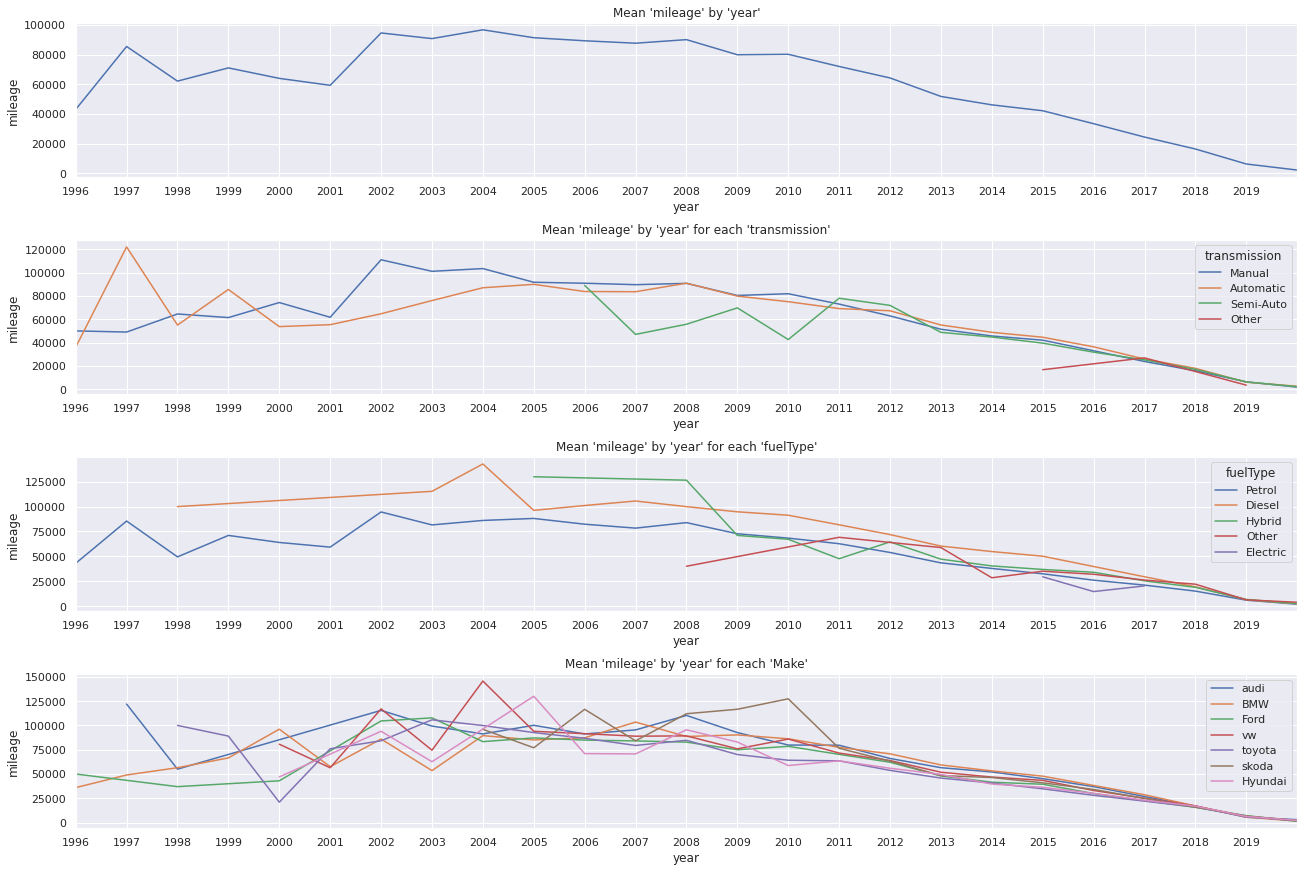

In [ ]:

fig, axes = plt.subplots(4, 1, figsize=(18, 12), constrained_layout =True)

# First plot
ax = sns.lineplot(ax = axes[0], data=df, x="year", y='mileage', ci=None)
ax.set_xticks(np.arange(1996, 2020, 1))
ax.set_title("Mean 'mileage' by 'year'")
ax.set_xlim(1996,2020)

# Second plot
ax1 = sns.lineplot(ax = axes[1], data=df, x='year', y='mileage', hue='transmission', ci=None)
ax1.set_xticks(np.arange(1996, 2020, 1))
ax1.set_title("Mean 'mileage' by 'year' for each 'transmission'")
ax1.set_xlim(1996,2020)

# Third plot
ax2 = sns.lineplot(ax = axes[2], data=df, x='year', y='mileage', hue='fuelType', ci=None)
ax2.set_xticks(np.arange(1996, 2020, 1))
ax2.set_title("Mean 'mileage' by 'year' for each 'fuelType'")
ax2.set_xlim(1996,2020)

# Third plot
ax3 = sns.lineplot(ax = axes[3], data=df, x='year', y='mileage', hue='Make', ci=None)
ax3.set_xticks(np.arange(1996, 2020, 1))
ax3.set_title("Mean 'mileage' by 'year' for each 'Make'")
ax3.set_xlim(1996,2020)
ax3.legend(loc='upper right')

plt.show()

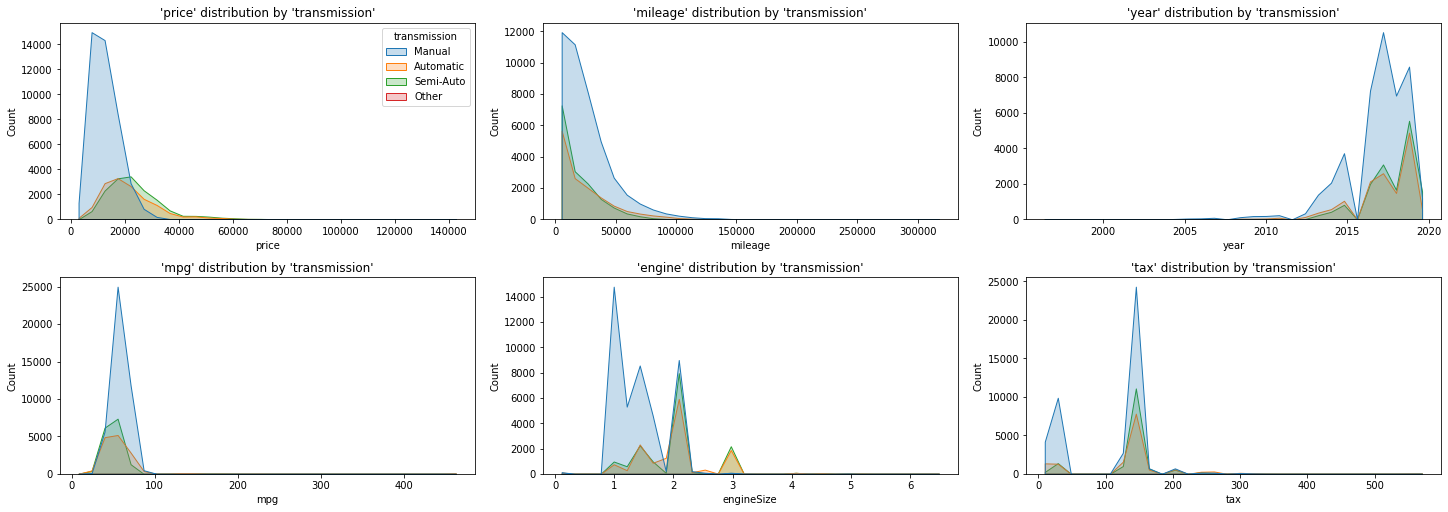

In [ ]:
# Bins number preset
b = 30

fig, axes = plt.subplots(2, 3, figsize=(20, 7), constrained_layout =True)

# First plot
ax = sns.histplot(ax = axes[0,0], data=df, x='price', hue='transmission', element='poly', bins = b)
ax.set_title("'price' distribution by 'transmission'")

# Second plot
ax1 = sns.histplot(ax = axes[0,1], data=df, x='mileage', hue='transmission', element='poly', bins = b, legend=False)
ax1.set_title("'mileage' distribution by 'transmission'")

# Third plot
ax2 = sns.histplot(ax = axes[0,2], data=df, x='year', hue='transmission', element='poly', bins = b, legend=False)
ax2.set_title("'year' distribution by 'transmission'")


# Fourth plot
ax3 = sns.histplot(ax = axes[1,0], data=df, x='mpg', hue='transmission', element='poly', bins = b, legend=False)
ax3.set_title("'mpg' distribution by 'transmission'")

# Fifth plot
ax4 = sns.histplot(ax = axes[1,1], data=df, x='engineSize', hue='transmission', element='poly', bins = b, legend=False)
ax4.set_title("'engine' distribution by 'transmission'")

# Sixth plot
ax5 = sns.histplot(ax = axes[1,2], data=df, x='tax', hue='transmission', element='poly', bins = b, legend=False)
ax5.set_title("'tax' distribution by 'transmission'")


plt.show()

In [ ]:
# Split data by 'make'
bmw = df[df['Make'] == 'BMW']
ford = df[df['Make'] == 'Ford']
hyundai = df[df['Make'] == 'Hyundai']
audi = df[df['Make'] == 'audi']
skoda = df[df['Make'] == 'skoda']
toyota = df[df['Make'] == 'toyota']
vw = df[df['Make'] == 'vw']

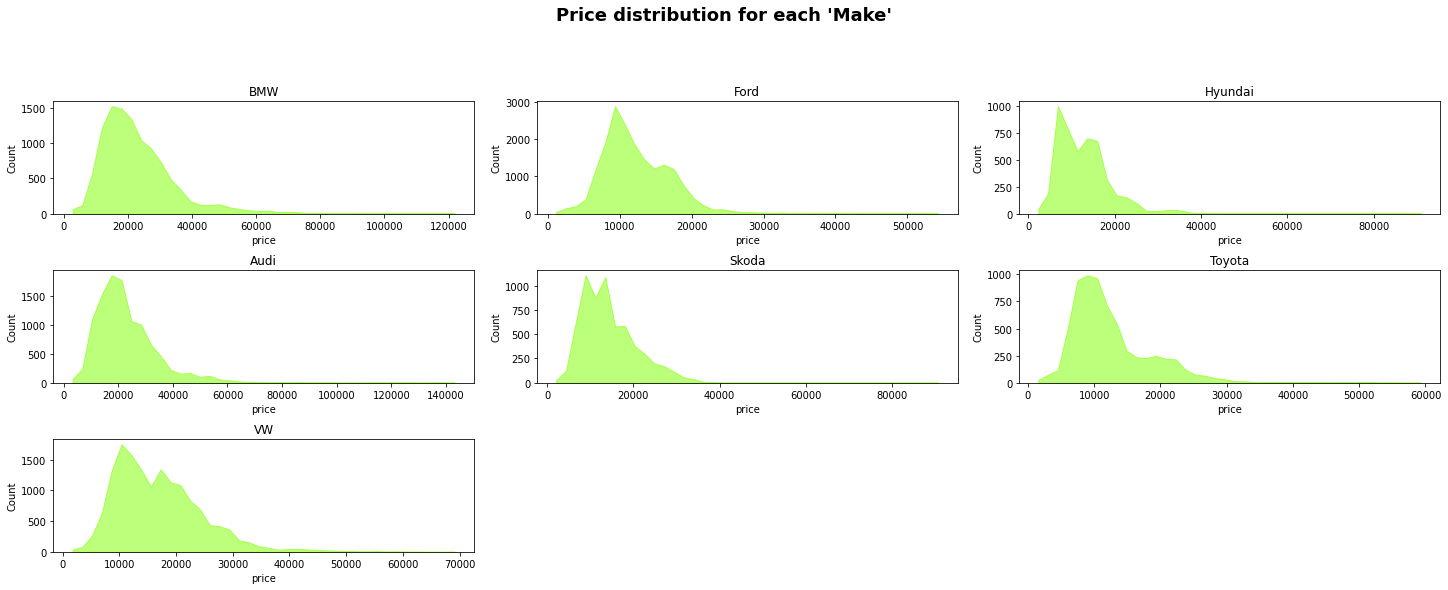

In [ ]:
# Bins number & color preset 
b = 40
c='#a6ff4d'

# Price distribution of each 'Make'
fig, axes = plt.subplots(3, 3, figsize=(20, 7), constrained_layout =True)
axes[-1, -1].axis('off') # hide axes
axes[-1, -2].axis('off') # hide axes
plt.suptitle("Price distribution for each 'Make'",y=1.15, family='Sherif', size=18, weight='bold')

# First plot
ax = sns.histplot(ax = axes[0,0], data=bmw, x='price', element='poly', bins = b, color = c)
ax.set_title("BMW")

# Second plot
ax = sns.histplot(ax = axes[0,1], data=ford, x='price', element='poly', bins = b, color = c)
ax.set_title("Ford")

# Third plot
ax = sns.histplot(ax = axes[0,2], data=hyundai, x='price', element='poly', bins = b, color = c)
ax.set_title("Hyundai")

# Fourth plot
ax = sns.histplot(ax = axes[1,0], data=audi, x='price', element='poly', bins = b, color = c)
ax.set_title("Audi")

# Fifth plot
ax = sns.histplot(ax = axes[1,1], data=skoda, x='price', element='poly', bins = b, color = c)
ax.set_title("Skoda")

# Sixth plot
ax = sns.histplot(ax = axes[1,2], data=toyota, x='price', element='poly', bins = b, color = c)
ax.set_title("Toyota")

# Seventh plot
ax = sns.histplot(ax = axes[2,0], data=vw, x='price', element='poly', bins = b, color = c)
ax.set_title("VW")

plt.show()

To investigate the distribution other numerical features for each 'Make', the above approach can be applied by changing the 'x' of each plot to a different numerical variable.

# Data Cleaning

In [ ]:
transmission_other = df[df['transmission'] == 'Other']
print(transmission_other)

# Replace 'other' with most frequent unique ('Manual') since  it only contains only 4 rows (I consider not enough information for the model)
df['transmission'] = df['transmission'].replace('Other', 'Manual')

         model  year  price transmission  ...    tax   mpg  engineSize     Make
57028    Yaris  2015  12795        Other  ...    0.0  78.0         1.5   toyota
67434    Scala  2019  15999        Other  ...  145.0  47.1         1.0    skoda
72314    Ioniq  2017  12495        Other  ...    0.0  78.5         1.6  Hyundai
72336   Tucson  2017  16995        Other  ...  145.0  39.8         1.6  Hyundai

[4 rows x 10 columns]


In [ ]:
electric_fuel = df[df['fuelType'] == 'Electric']
print(electric_fuel)

other_fuel = df[df['fuelType'] == 'Other']
print(other_fuel)

         model  year  price transmission  ...    tax    mpg  engineSize  Make
19043       i3  2017  18999    Automatic  ...  135.0  470.8         0.0   BMW
19068       i3  2016  18999    Automatic  ...    0.0  470.8         0.0   BMW
19503       i3  2015  17400    Automatic  ...    0.0  470.8         1.0   BMW
27834   Mondeo  2016  15975    Automatic  ...    0.0   67.3         2.0  Ford
33408   Mondeo  2016  15500    Automatic  ...    0.0   67.3         2.0  Ford

[5 rows x 10 columns]
           model  year  price transmission  ...    tax    mpg  engineSize     Make
10684   3 Series  2017  14250    Automatic  ...  135.0  148.7         2.0      BMW
10700         i3  2016  17100    Automatic  ...    0.0  470.8         0.6      BMW
10703   2 Series  2017  13000    Automatic  ...    0.0  141.2         1.5      BMW
10754   2 Series  2017  16000    Automatic  ...    0.0  141.2         1.5      BMW
10786         X5  2016  21000    Automatic  ...    0.0   85.6         2.0      BMW
...        

In [ ]:
# Assign 'Electric' fuelType  unique  to 'Other' since  it only contains only 5 rows (I consider not enough information for the model).
df['fuelType'] = df['fuelType'].replace('Electric', 'Other')

There are several values of 'mpg' higher than 400, and seems to appear as outliers if we check the scatterplots.

However, these values seems to be very explainable for the BMW 'Make', since the values are for these cars. Considering that, the values will be kept.

# Feature engineering

In [ ]:
# Turn categoricals into numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for c in categoricals:
  df[c] = le.fit_transform(df[c])

In [ ]:
# Convert our categorical columns to dummies
for col in categoricals:
    dumm = pd.get_dummies(df[col], prefix = str(col)+'_', dtype=int)
    df = pd.concat([df,dumm], axis=1)

In [ ]:
# Drop the original categories since we one hot encoded them
df.drop(categoricals, axis=1, inplace=True)
df.shape

(72435, 166)

# Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features & target
y = df['price']
X = df.drop('price', axis = 1)
print(X.shape, y.shape)
print('\n')

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(72435, 165) (72435,)


(57948, 165) (57948,)
(14487, 165) (14487,)


# Modeling

# Linear Regressors

In [ ]:
 from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, ElasticNet, Lars, Lasso, BayesianRidge, HuberRegressor
 from sklearn.metrics import mean_squared_error

r_squared = []
rmses = []
 
 lin_reg = [('LR', LinearRegression()), ('Ridge', Ridge()), ('SGDR', SGDRegressor()), 
            ('ElasticNet', ElasticNet()), ('Lars', Lars()), ('Lasso', Lasso()),
            ('BayesianRidge', BayesianRidge()), ('HuberRegressor', HuberRegressor())] 


for name, model in lin_reg:
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, preds))
  rs = model.score(X_test, y_test)
  r_squared.append(rs)
  rmses.append(rmse)
  print(f'The accuracy of {name} is {rmse:.3f}')
  print(f'The R^2 of {name} is {rs:.3f}')
  print('\n')

The accuracy of LR is 5028449348329576.000
The R^2 of LR is -285954167823675837906944.000


The accuracy of Ridge is 3104.310
The R^2 of Ridge is 0.891


The accuracy of SGDR is 130540771683.098
The R^2 of SGDR is -192717264508239.625


The accuracy of ElasticNet is 3677.801
The R^2 of ElasticNet is 0.847


The accuracy of Lars is 37592294054152113633414348800.000
The R^2 of Lars is -15981808758282339501394158018900204174680094932992.000


The accuracy of Lasso is 3104.537
The R^2 of Lasso is 0.891


The accuracy of BayesianRidge is 3104.238
The R^2 of BayesianRidge is 0.891


The accuracy of HuberRegressor is 3142.452
The R^2 of HuberRegressor is 0.888




In [ ]:
# Create a dataframe that contains relevant performances of the linear regressors
models = [name for name, model in lin_reg]

# Exclude worst models & their performances
remove_indices = [0,2,4]
models = [i for j, i in enumerate(models) if j not in remove_indices]
r_squared = [i for j, i in enumerate(r_squared) if j not in remove_indices]
rmses =  [i for j, i in enumerate(rmses) if j not in remove_indices]

scores_lin_reg = pd.DataFrame({'Model': models, 'Test_R^2': r_squared, 'Test_RMSE': rmses})

findfont: Font family ['Sherif'] not found. Falling back to DejaVu Sans.


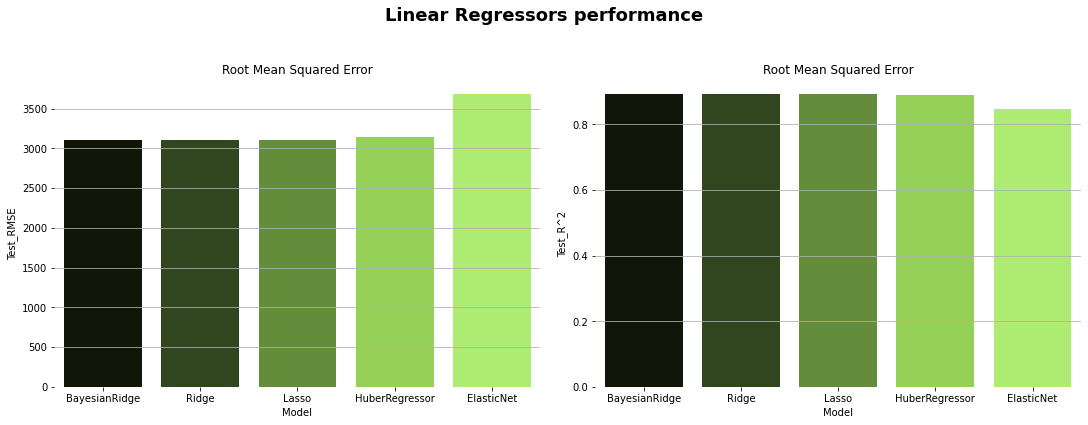

In [ ]:
# Hide spines (black border of the plot)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

# Plot linear regressors performance
fig, axes = plt.subplots(1, 2, figsize=(15, 5), constrained_layout =True)
plt.suptitle("Linear Regressors performance", x=0.5 ,y=1.15, family='Sherif', size=18, weight='bold')

ax = sns.barplot(ax = axes[0], data=scores_lin_reg.sort_values('Test_RMSE'), x='Model', y='Test_RMSE', palette=colors)
ax.set_title('Root Mean Squared Error')
ax.grid(axis='y')

ax1 = sns.barplot(ax = axes[1], data=scores_lin_reg.sort_values('Test_R^2', ascending = False), x='Model', y='Test_R^2', palette=colors)
ax1.set_title('R^2')
ax1.grid(axis='y')

As can be observed there are 3 models with similar results.

However, the one that slighty wins, is the BayesianRidge Regressor:
 - RMSE: 3104.238
 - R^2: 0.891

 Let's try other modeling approaches.

# Ensemble methods

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
SEED = 123
rf = RandomForestRegressor(random_state=SEED)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, preds))
rs_rf = rf.score(X_test, y_test)

print(f'Random Forest RMSE is: {rmse_rf}')
print(f'Random Forest R^2 is: {rs_rf}')

Random Forest RMSE is: 1821.3774418649289
Random Forest R^2 is: 0.9624829935393483


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=SEED)
gb.fit(X_train, y_train)
preds = gb.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, preds))
rs_gb = gb.score(X_test, y_test)

print(f'Gradient Boosting RMSE is: {rmse_gb}')
print(f'Gradient Boosting R^2 is: {rs_gb}')

Gradient Boosting RMSE is: 2806.7975475179737
Gradient Boosting R^2 is: 0.9109055916930904


## Extreme Gradient Boosting (XGBoost)

In [ ]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(seed=SEED)
xgb_reg.fit(X_train, y_train)
preds = xgb_reg.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, preds))
rs_xgb = xgb_reg.score(X_test, y_test)

print(f'XGBost RMSE is: {rmse_xgb}')
print(f'XGBoost R^2 is: {rs_gb}')

[07:03:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBost RMSE is: 2802.8607297560743
XGBoost R^2 is: 0.911155344276287


In [ ]:
# Create dataframe with ensemble methods performances
models_en = ['RandomForest', 'GradientBoosting', 'XGBoost']
rmses_en = [rmse_rf, rmse_gb, rmse_xgb]
r_squared_en = [rs_rf, rs_gb, rs_xgb]

scores_en = pd.DataFrame({'Model': models_en, 'Test_R^2': r_squared_en, 'Test_RMSE': rmses_en})

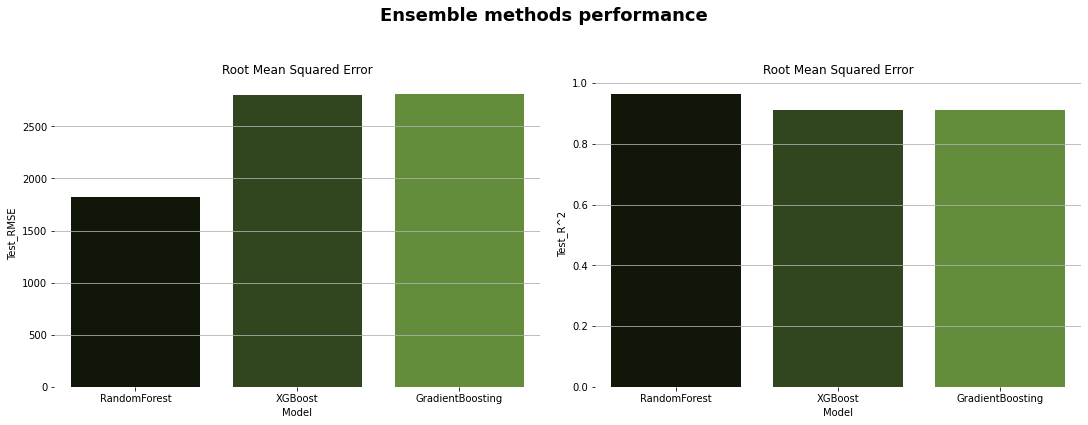

In [ ]:
# Plot ensemble methods performance
fig, axes = plt.subplots(1, 2, figsize=(15, 5), constrained_layout =True)
plt.suptitle("Ensemble methods performance", x=0.5 ,y=1.15, family='Sherif', size=18, weight='bold')

ax = sns.barplot(ax = axes[0], data=scores_en.sort_values('Test_RMSE'), x='Model', y='Test_RMSE', palette=colors)
ax.set_title('Root Mean Squared Error')
ax.grid(axis='y')

ax1 = sns.barplot(ax = axes[1], data=scores_en.sort_values('Test_R^2', ascending = False), x='Model', y='Test_R^2', palette=colors)
ax1.set_title('R^2r')
ax1.grid(axis='y')

It can be observed that the ensemble methods perform much better than the linear regressors.

The best performance is obtained by the RandoMForest:
 - RMSE: 1821.37
 - R^2:  0.96


 Let's see if these results can be improved.

# Hyperparameters tuning for Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

params_rf = {'n_estimators':[50, 100, 200],
               'max_depth':[None, 1, 2],
               'min_samples_leaf':[0.5,1,1.5,2]}

grid_rf = GridSearchCV(estimator=rf, 
                       param_grid=params_rf,
                       cv=5, 
                       scoring = 'neg_mean_squared_error',
                       )

grid_rf.fit(X_train, y_train)

best_hyperparams = grid_rf.best_params_

print(f'The best hyperparameters found for RF are: {best_hyperparams}')

The best hyperparameters found for RF are: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}


## Evaluation

In [ ]:
best_rf = grid_rf.best_estimator_

preds = best_rf.predict(X_test)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, preds))
rs_best_rf = best_rf.score(X_test, y_test)

print(f'Best RF RMSE is: {rmse_best_rf}')
print(f'Best RF R^2 is: {rs_best_rf}')

Best RF RMSE is: 1814.2552152164742
Best RF R^2 is: 0.9627758292635739


The performance of the RandomForest Regressor was slightly improved.
The RMSE was reduced to 1814.25